In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [19]:
survey <- read.csv('survey lung cancer.csv')
head(survey)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
3,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
4,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
5,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
6,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


<b>Descriptions of each row and their data type

A

<b>Clean and Wrangle data

In [20]:
#Probably should change survey_2 to something else
survey_2 <- survey %>%
    summarize(gender = GENDER,
              age = AGE,
              smoking = SMOKING - 1 == 1,
              yellow_fingers = YELLOW_FINGERS - 1 == 1,
              anxiety = ANXIETY - 1 == 1,
              chronic_disease = CHRONIC.DISEASE - 1 == 1,
              fatigue = FATIGUE - 1 == 1,
              allergy = ALLERGY - 1 == 1,
              wheezing = WHEEZING - 1 == 1,
              alcohol_consuming = ALCOHOL.CONSUMING - 1 == 1,
              coughing = COUGHING - 1 == 1,
              shortness_of_breath = SHORTNESS.OF.BREATH - 1 == 1,
              swallowing_difficulty = SWALLOWING.DIFFICULTY - 1 == 1,
              chest_pain = CHEST.PAIN - 1 == 1,
              lung_cancer = LUNG_CANCER == "YES"
             )
head(survey_2)

,gender,age,smoking,yellow_fingers,anxiety,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
,<chr>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,M,69,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
2,M,74,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
3,F,59,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE
4,M,63,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
5,F,63,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
6,F,75,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE


In [21]:
# Means of catagorical variables: Each observation is equal to 1 if the result is of interest, and 0 otherwise.
# Then, when everything is summed, the sum is the number of observations of interest.
# This sum is divided by the number of observations. Sounds like both the proportion and mean, right?
survey_summary <- survey_2 %>%
    summarize(male_prop = mean(gender == "M"),
              mean_age = mean(age),
              smoking_prop = mean(smoking),
              yellow_fingers_prop = mean(yellow_fingers),
              anxiety_prop = mean(anxiety),
              chronic_disease_prop = mean(chronic_disease),
              fatigue_prop = mean(fatigue),
              allergy_prop = mean(allergy),
              wheezing_prop = mean(wheezing),
              alcohol_consuming_prop = mean(alcohol_consuming),
              coughing_prop = mean(coughing),
              shortness_of_breath_prop = mean(shortness_of_breath),
              swallowing_difficulty_prop = mean(swallowing_difficulty),
              chest_pain_prop = mean(chest_pain),
              lung_cancer_prop = mean(lung_cancer)
    )

In [22]:
# Means of catagorical variables: Each observation is equal to 1 if the result is of interest, and 0 otherwise.
# Then, when everything is summed, the sum is the number of observations of interest.
# This sum is divided by the number of observations. Sounds like both the proportion and mean, right?
survey_summary_with_lung_cancer <- survey_2 %>%
    summarize(male_prop = mean(gender == "M" & lung_cancer),
              female_prop = mean(gender == "F" & lung_cancer),
              mean_age = mean(age),
              smoking_prop = mean(smoking & lung_cancer),
              yellow_fingers_prop = mean(yellow_fingers & lung_cancer),
              anxiety_prop = mean(anxiety & lung_cancer),
              chronic_disease_prop = mean(chronic_disease & lung_cancer),
              fatigue_prop = mean(fatigue & lung_cancer),
              allergy_prop = mean(allergy & lung_cancer),
              wheezing_prop = mean(wheezing & lung_cancer),
              alcohol_consuming_prop = mean(alcohol_consuming & lung_cancer),
              coughing_prop = mean(coughing & lung_cancer),
              shortness_of_breath_prop = mean(shortness_of_breath & lung_cancer),
              swallowing_difficulty_prop = mean(swallowing_difficulty & lung_cancer),
              chest_pain_prop = mean(chest_pain & lung_cancer),
              lung_cancer_prop = mean(lung_cancer & lung_cancer)
    )
head(survey_summary)
head(survey_summary_with_lung_cancer)

,male_prop,mean_age,smoking_prop,yellow_fingers_prop,anxiety_prop,chronic_disease_prop,fatigue_prop,allergy_prop,wheezing_prop,alcohol_consuming_prop,coughing_prop,shortness_of_breath_prop,swallowing_difficulty_prop,chest_pain_prop,lung_cancer_prop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5242718,62.67314,0.5631068,0.5695793,0.4983819,0.5048544,0.6731392,0.5566343,0.5566343,0.5566343,0.579288,0.6407767,0.4692557,0.5566343,0.8737864


,male_prop,female_prop,mean_age,smoking_prop,yellow_fingers_prop,anxiety_prop,chronic_disease_prop,fatigue_prop,allergy_prop,wheezing_prop,alcohol_consuming_prop,coughing_prop,shortness_of_breath_prop,swallowing_difficulty_prop,chest_pain_prop,lung_cancer_prop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4692557,0.4045307,62.67314,0.5016181,0.5275081,0.4595469,0.4595469,0.6116505,0.5404531,0.5275081,0.5339806,0.5469256,0.5695793,0.4530744,0.5177994,0.8737864


In [23]:
survey_clean_wrangled <- survey_2 %>%
    filter(lung_cancer == TRUE) %>%
    select(gender, smoking, alcohol_consuming) %>%
    mutate(none = !smoking & !alcohol_consuming, both = smoking & alcohol_consuming)

head(survey_clean_wrangled)

,gender,smoking,alcohol_consuming,none,both
,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1,M,FALSE,TRUE,FALSE,FALSE
2,M,TRUE,FALSE,FALSE,FALSE
3,F,FALSE,FALSE,TRUE,FALSE
4,M,TRUE,TRUE,FALSE,TRUE
5,F,TRUE,FALSE,FALSE,FALSE
6,M,TRUE,TRUE,FALSE,TRUE


In [39]:
survey_summary_clean_wrangled <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(none_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              smoking_prop = mean(smoking == TRUE & alcohol_consuming != TRUE),
              alcohol_consuming_prop = mean(alcohol_consuming == TRUE & smoking != TRUE),
              both_prop = mean(smoking == TRUE & alcohol_consuming == TRUE))

survey_summary_clean_wrangled

gender,none_prop,smoking_prop,alcohol_consuming_prop,both_prop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.4000000,0.2160000,0.1600000
M,0.08275862,0.1034483,0.3310345,0.4827586


Out of people with lung cancer, 40% of the females were only smokers, 10% of the males were only smokers, 22% of the females were only drinkers, 33% of the males were only drinkers, 16% of the females did both, and 48% of the males did both.

In [67]:
none_prop_CI <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(none_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              se = sqrt(none_prop * (1 - none_prop) / n()),
              lower_ci = none_prop - (qnorm(0.975) * se),
              upper_ci = none_prop + (qnorm(0.975) * se))

smoking_prop_CI<- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(smoking_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              se = sqrt(smoking_prop * (1 - smoking_prop) / n()),
              lower_ci = smoking_prop - (qnorm(0.975) * se),
              upper_ci = smoking_prop + (qnorm(0.975) * se))

alcohol_consuming_prop_CI <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(alcohol_consuming_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              se = sqrt(alcohol_consuming_prop* (1 - alcohol_consuming_prop) / n()),
              lower_ci = alcohol_consuming_prop - (qnorm(0.975) * se),
              upper_ci = alcohol_consuming_prop + (qnorm(0.975) * se))

both_prop_CI <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(both_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              se = sqrt(both_prop * (1 - both_prop) / n()),
              lower_ci = both_prop - (qnorm(0.975) * se),
              upper_ci = both_prop + (qnorm(0.975) * se))

none_prop_CI
smoking_prop_CI
alcohol_consuming_prop_CI
both_prop_CI

gender,none_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.03729064,0.15091168,0.2970883
M,0.08275862,0.02288044,0.03791378,0.1276035


gender,smoking_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.03729064,0.15091168,0.2970883
M,0.08275862,0.02288044,0.03791378,0.1276035


gender,alcohol_consuming_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.03729064,0.15091168,0.2970883
M,0.08275862,0.02288044,0.03791378,0.1276035


gender,both_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.03729064,0.15091168,0.2970883
M,0.08275862,0.02288044,0.03791378,0.1276035


Bootstrapping ```survey_summary_clean_wrangled```: 

In [8]:
set.seed(1)
bootstrap_survey_smoking <- survey_clean_wrangled %>%
    mutate(only_smoking = !alcohol_consuming & smoking) %>%
    specify(formula = only_smoking ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

head(bootstrap_survey_smoking)

replicate,stat
<int>,<dbl>
1,0.2355167
2,0.2928037
3,0.3438735
4,0.3073549
5,0.2296296
6,0.2258224


In [9]:
set.seed(1)
bootstrap_survey_alcohol_consuming <- survey_clean_wrangled %>%
    mutate(only_alcohol_consuming = alcohol_consuming & !smoking) %>%
    specify(formula = only_alcohol_consuming ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

head(bootstrap_survey_alcohol_consuming)

replicate,stat
<int>,<dbl>
1,-0.07062163
2,-0.11531690
3,-0.14393939
4,-0.20850202
5,-0.08888889
6,-0.07688506


In [10]:
set.seed(1)
bootstrap_survey_both <- survey_clean_wrangled %>%
    specify(formula = both ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

head(bootstrap_survey_both)

replicate,stat
<int>,<dbl>
1,-0.3021314
2,-0.3654269
3,-0.3850461
4,-0.2371795
5,-0.2518519
6,-0.3257181


In [11]:
set.seed(1)
bootstrap_survey_none <- survey_clean_wrangled %>%
    specify(formula = none ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

head(bootstrap_survey_none)

replicate,stat
<int>,<dbl>
1,0.1372364
2,0.1879401
3,0.1851120
4,0.1383266
5,0.1111111
6,0.1767807


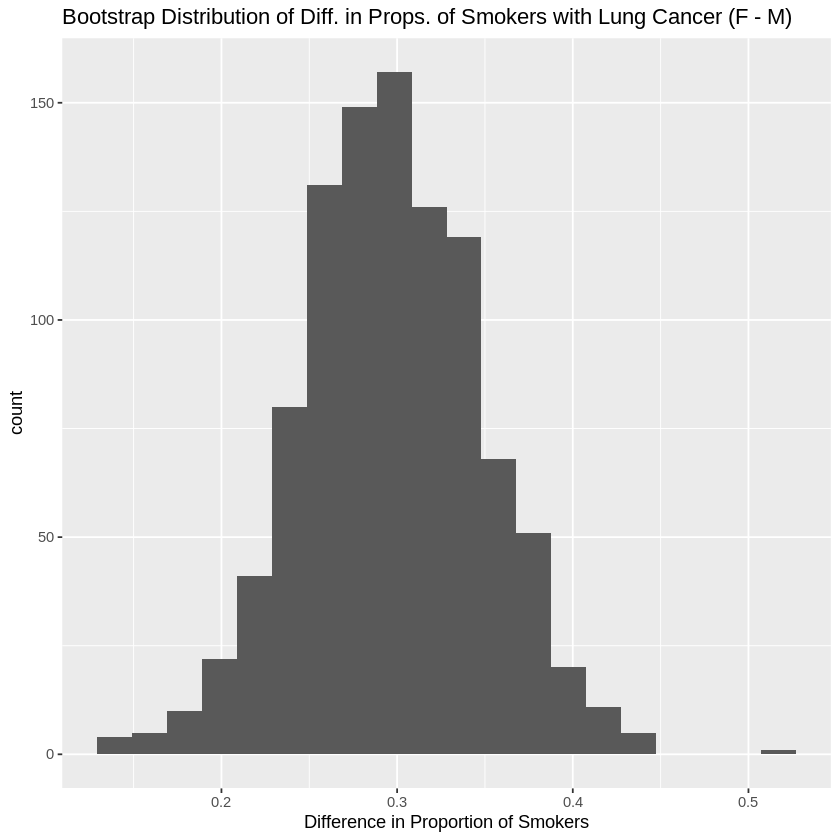

In [12]:
bootstrap_survey_smoking_plot <- bootstrap_survey_smoking %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Smokers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Smokers with Lung Cancer (F - M)")

bootstrap_survey_smoking_plot

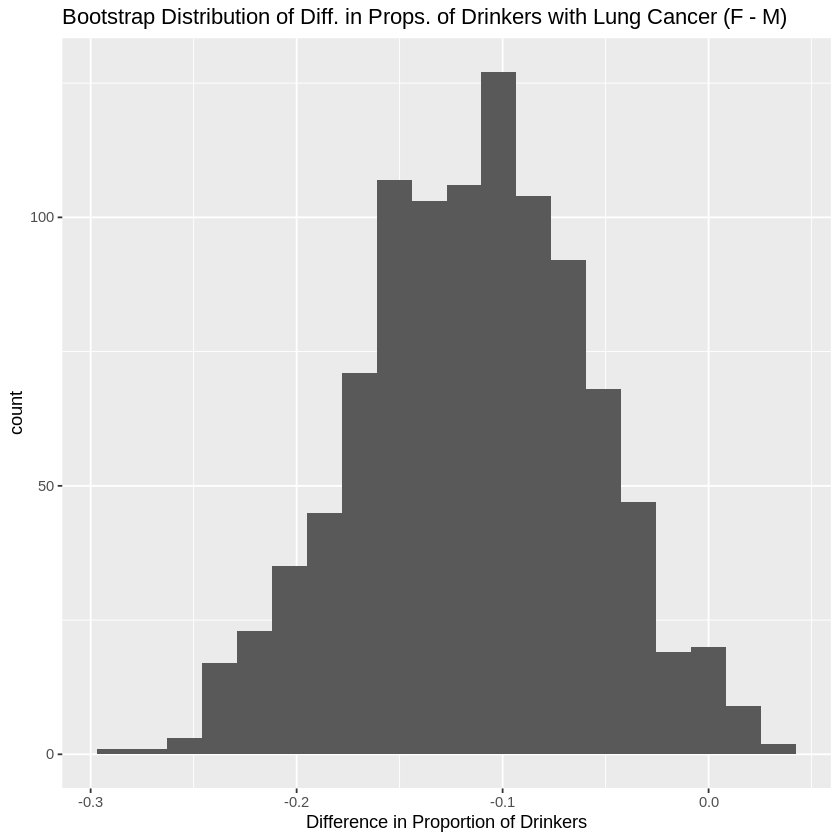

In [13]:
bootstrap_survey_alcohol_consuming_plot <- bootstrap_survey_alcohol_consuming %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Drinkers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Drinkers with Lung Cancer (F - M)")

bootstrap_survey_alcohol_consuming_plot

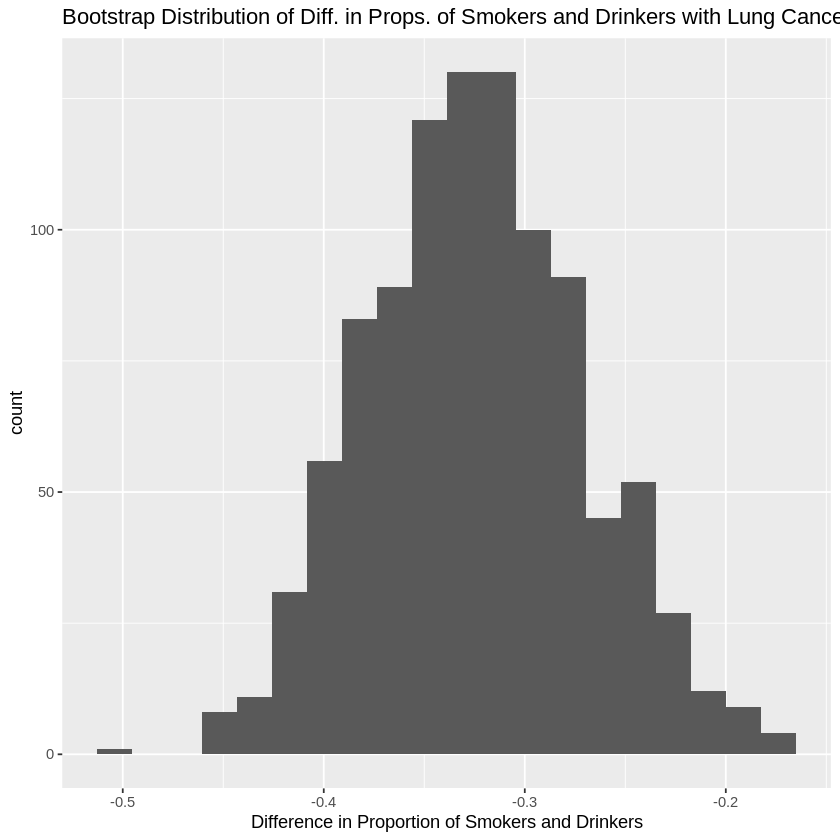

In [14]:
bootstrap_survey_both_plot <- bootstrap_survey_both %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Smokers and Drinkers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Smokers and Drinkers with Lung Cancer (F - M)")

bootstrap_survey_both_plot

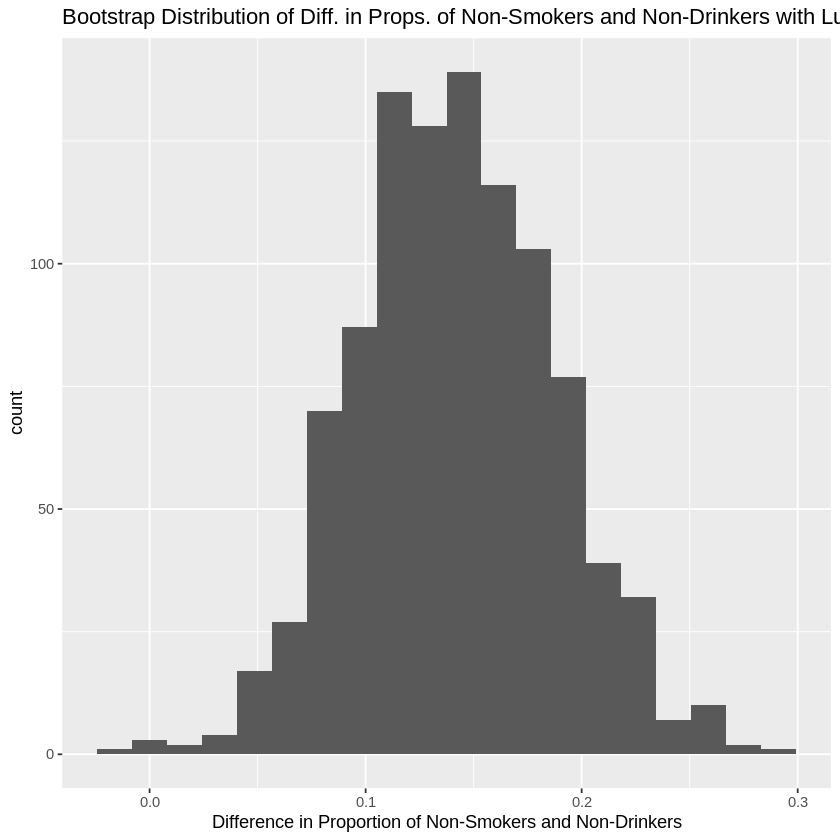

In [15]:
bootstrap_survey_none_plot <- bootstrap_survey_none %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Non-Smokers and Non-Drinkers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Non-Smokers and Non-Drinkers with Lung Cancer (F - M)")

bootstrap_survey_none_plot